<a href="https://colab.research.google.com/github/emruwah/Python/blob/master/bhp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, zscore

In [13]:
df=pd.read_csv('/content/bhp.csv')

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
df.shape

(13200, 7)

In [16]:
upper_limit=df['price_per_sqft'].quantile(0.999)
lower_limit=df['price_per_sqft'].quantile(0.001)
print(upper_limit,lower_limit)

50959.36200000098 1366.184


In [17]:
df_new=df[(df['price_per_sqft'] <=50959.36200000098) & (df['price_per_sqft'] >= 1366.184)]
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [18]:
print("Highest allowed",df['price_per_sqft'].mean() + 4*df['price_per_sqft'].std())
print("Lowest allowed",df['price_per_sqft'].mean() - 4*df['price_per_sqft'].std())

Highest allowed 434828.9780548589
Lowest allowed -418988.30457001046


In [19]:
df[(df['price_per_sqft']>434828.97) | (df['price_per_sqft']<-418988.30)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

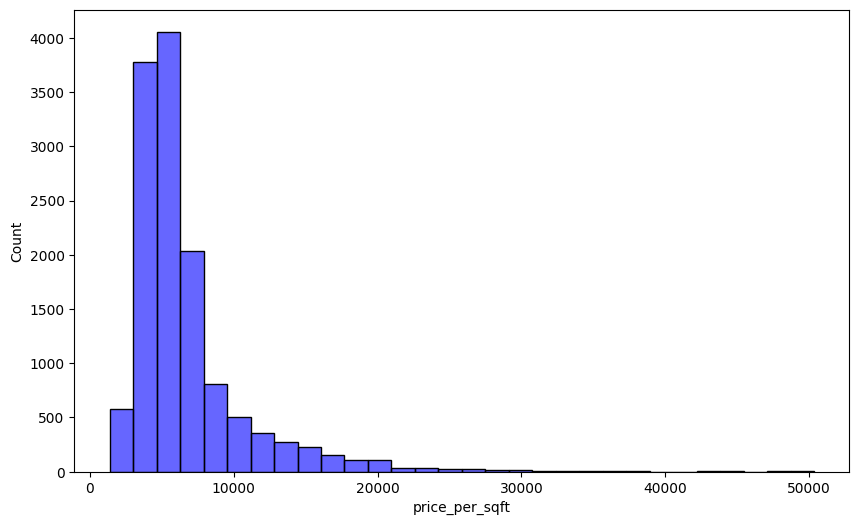

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_new['price_per_sqft'], kde=False, bins=30, color='blue', alpha=0.6)

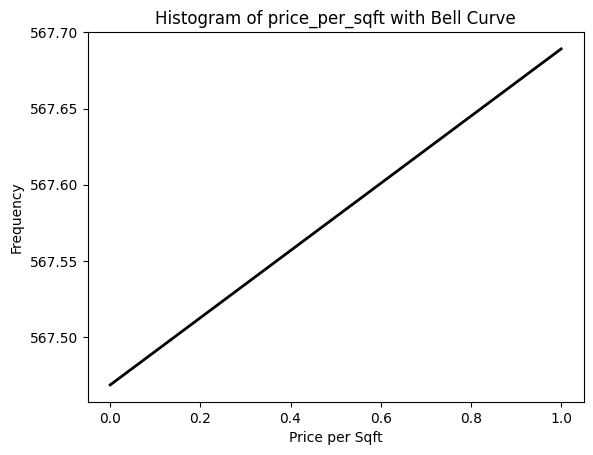

In [22]:
mu, std = norm.fit(df_new['price_per_sqft'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p * np.diff(np.histogram(df_new['price_per_sqft'], bins=30)[1])[0] * len(df_new['price_per_sqft']), 'k', linewidth=2)

plt.title('Histogram of price_per_sqft with Bell Curve')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [24]:
df_new['zscore'] = zscore(df_new['price_per_sqft'])
df_new_zscore = df_new[df_new['zscore'].abs() < 4]

print(f"Shape after Z-score filtering: {df_new_zscore.shape}")

Shape after Z-score filtering: (13047, 8)


<ipython-input-24-c835e602de93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['zscore'] = zscore(df_new['price_per_sqft'])


In [25]:
df_new_zscore.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715951
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494741
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569604
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101103
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582887
